# Bank Customer "Churn Rate" Project

## Objective:

To predict whether or not a bank customer will leave within the next six months.

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
# Reading the dataset

bank = pd.read_csv('bank.csv')

In [11]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Dropping 'CustomerId' and 'Surname' column

bank.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [13]:
bank.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [15]:
# One-Hot-Encoding categorical variables

bank = pd.get_dummies(bank)

In [17]:
bank.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


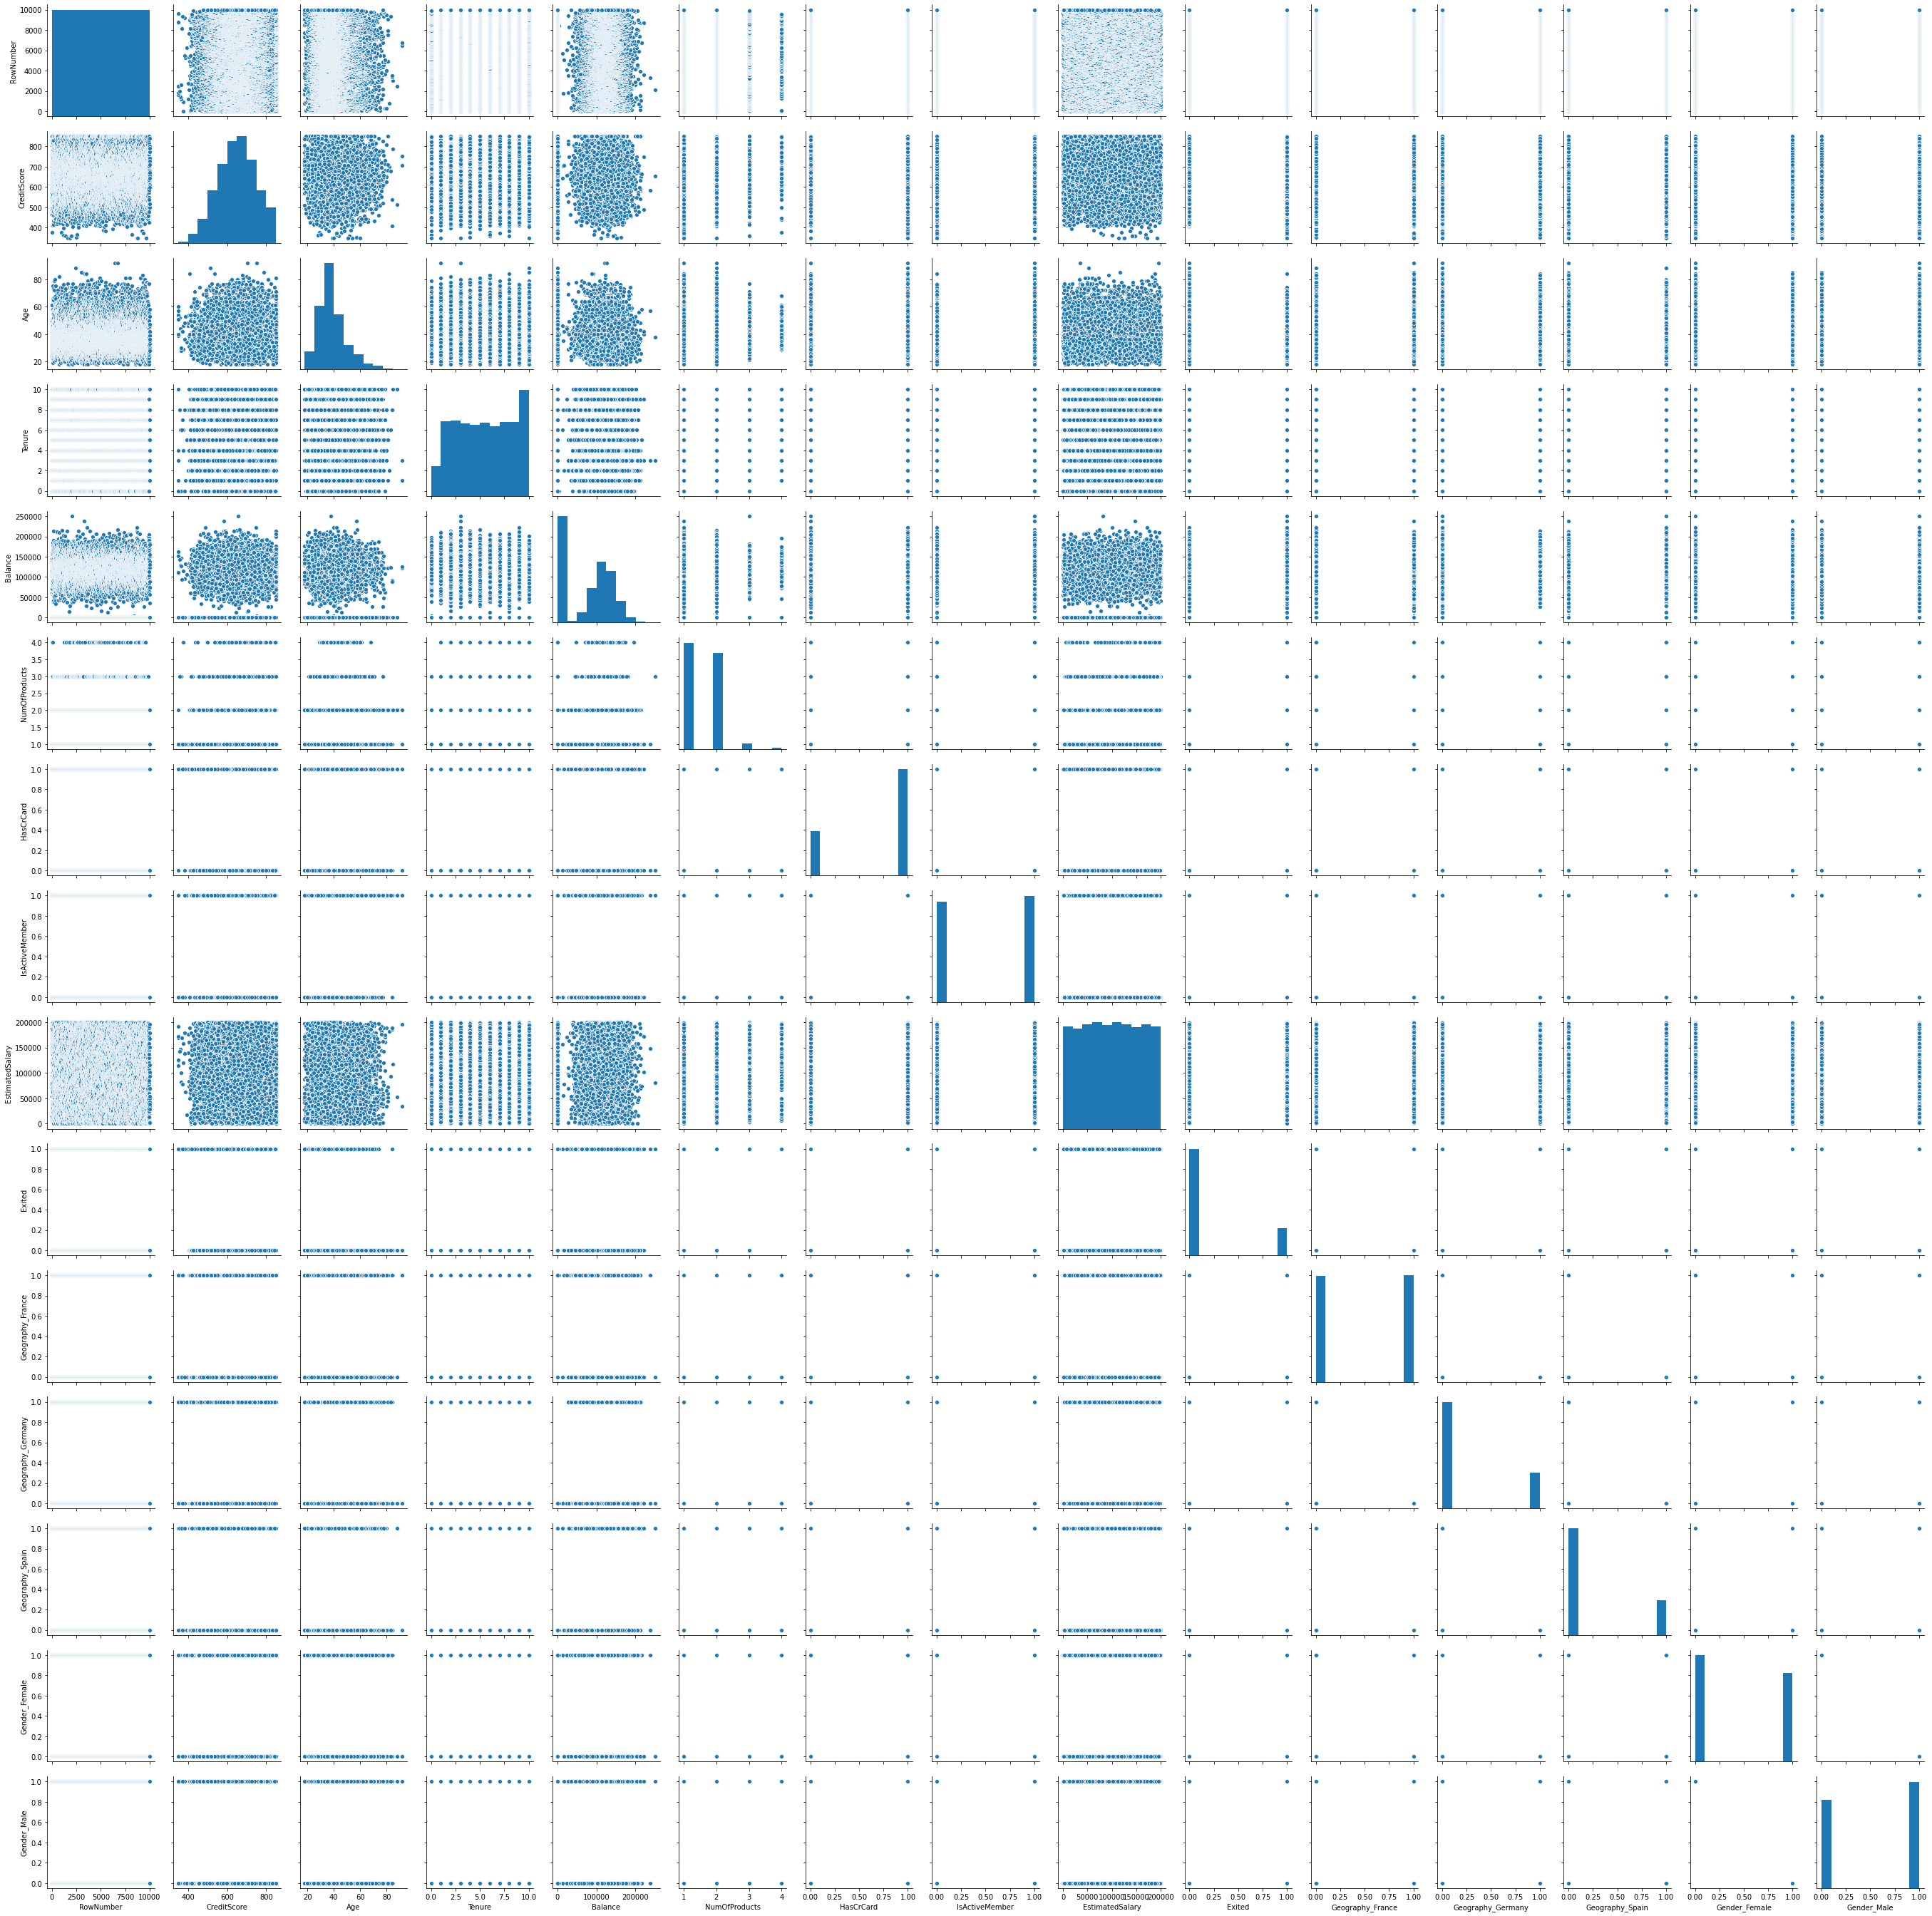

In [19]:
# Bivariate analysis

sb.pairplot(bank)

<AxesSubplot:>

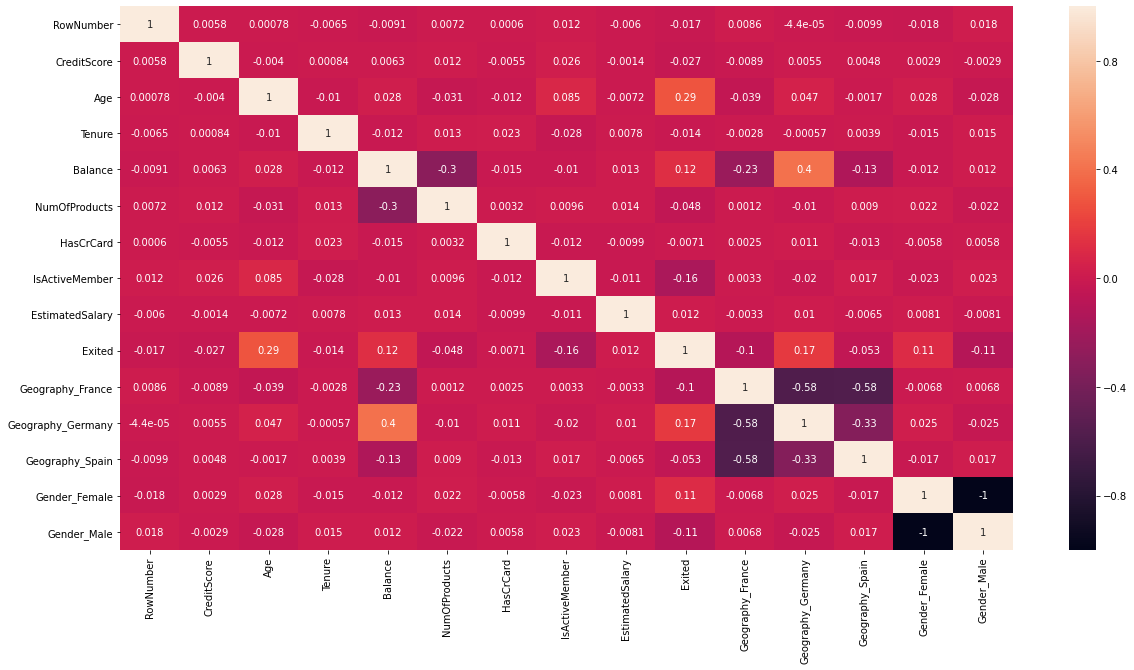

In [55]:
# Correlation heatmap

plt.figure(figsize=(20,10))

sb.heatmap(bank.corr(), annot=True)

In [21]:
# Splitting data into train/test
from sklearn.model_selection import train_test_split
X = bank.iloc[:, :-1].values
y = bank.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# Scaling train/test data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 1.5200826 , -0.55032881, -0.36597914, ...,  1.75478035,
        -0.5731713 ,  1.08347268],
       [-1.4173669 , -1.31119605,  0.11306906, ..., -0.56987189,
        -0.5731713 ,  1.08347268],
       [-0.8987494 ,  0.57040807,  0.30468834, ..., -0.56987189,
         1.74467913,  1.08347268],
       ...,
       [ 1.49000278,  0.35448628,  0.11306906, ..., -0.56987189,
        -0.5731713 , -0.92295821],
       [ 1.1743376 ,  0.42646021,  2.89154862, ..., -0.56987189,
        -0.5731713 , -0.92295821],
       [ 0.08143767,  0.82745781,  0.97535582, ...,  1.75478035,
        -0.5731713 ,  1.08347268]])

In [58]:
# Building neural network architecture
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

def build_model(X_train, y_train):
    model = Sequential()
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae'])
    model.fit(X_train, y_train, epochs=30, batch_size=100, verbose=1)
    return model

In [59]:
build_model(X_train, y_train)

Epoch 1/30
70/70 [==============================] - 1s 1ms/step - loss: 1784.7309 - mae: 0.4647
Epoch 2/30
70/70 [==============================] - 0s 1ms/step - loss: 143.8958 - mae: 0.4594
Epoch 3/30
70/70 [==============================] - 0s 1ms/step - loss: 161.4711 - mae: 0.4618
Epoch 4/30
70/70 [==============================] - 0s 1ms/step - loss: 206.8317 - mae: 0.4572
Epoch 5/30
70/70 [==============================] - 0s 1ms/step - loss: 145.0295 - mae: 0.4615
Epoch 6/30
70/70 [==============================] - 0s 1ms/step - loss: 159.9376 - mae: 0.4544
Epoch 7/30
70/70 [==============================] - 0s 2ms/step - loss: 113.9378 - mae: 0.4590
Epoch 8/30
70/70 [==============================] - 0s 1ms/step - loss: 109.5624 - mae: 0.4653
Epoch 9/30
70/70 [==============================] - 0s 1ms/step - loss: 98.0590 - mae: 0.4589
Epoch 10/30
70/70 [==============================] - 0s 1ms/step - loss: 184.7448 - mae: 0.4522
Epoch 11/30
70/70 [==============================